# Experimentación de dos variables

## Importando bibliotecas
- <b>Pandas</b>: Nos sirve para leer datos y filtrarlos.
- <b>Seaborn</b>: Es una biblioteca para graficar que nos permite interactuar con datos de Pandas.

- <i>Numpy y Matplotlib son dependencias de Pandas.</i>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Leyendo resultados
Primero, leemos el archivo de resultados de ejecución de bt. Para esto, vamos a abrirlo con Pandas y guardarlo en un DataFrame (df).

In [6]:
df = pd.read_csv("tp2/complejidades_treePR_mas.csv")
df['t'] = df['tiempo']
print(df)

      fila  columna       tiempo            t
0        2        2     0.026269     0.026269
1        2       22     0.196441     0.196441
2        2       42     0.342830     0.342830
3        2       62     0.700715     0.700715
4        2       82     0.864493     0.864493
5        2      102     0.970999     0.970999
6        2      122     1.131630     1.131630
7        2      142     1.264490     1.264490
8        2      162     1.351860     1.351860
9        2      182     1.416310     1.416310
10       2      202     1.430540     1.430540
11       2      222     1.606380     1.606380
12       2      242     1.969670     1.969670
13       2      262     2.173010     2.173010
14       2      282     2.182850     2.182850
15       2      302     2.315400     2.315400
16       2      322     2.470550     2.470550
17       2      342     2.642200     2.642200
18       2      362     2.708670     2.708670
19       2      382     2.711260     2.711260
20       2      402     2.856250  

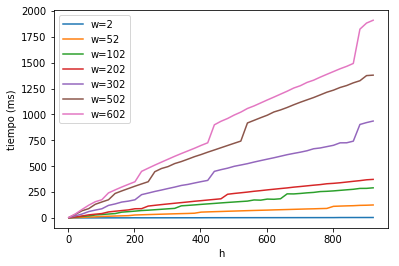

In [11]:
# Graficamos el tiempo en función de n, con series variando m.
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 2]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 42]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 102]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 142]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 302]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 502]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 602]);
ax1.legend(["w=2", "w=52", "w=102", "w=202" , "w=302" , "w=502" , "w=602" ]);
plt.ylabel("tiempo (ms)");
plt.xlabel("h");

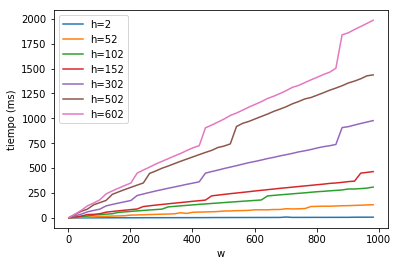

In [12]:
# Graficamos el tiempo en función de m, con series variando n.
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 2]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 42]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 102]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 142]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 302]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 502]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 602]);
ax1.legend(["h=2", "h=52", "h=102" , "h=152", "h=302", "h=502", "h=602"]);
plt.ylabel("tiempo (ms)");
plt.xlabel("w");

Al igual que en $meet$-$in$-$the$-$middle$, y como mencionamos en el gráfico anterior, notamos un comportamiento errático para un mismo $n$ con distintos $W$. Esto refuerza nuestra hipótesis del párrafo anterior, por lo que utilizaremos la experimentación descrita para corroborarla o refutarla.

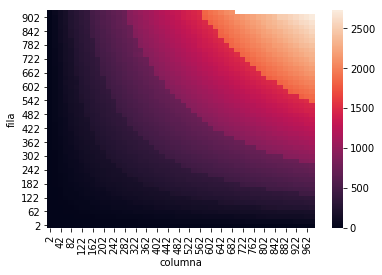

In [20]:
heat_df = df.pivot("fila", "columna", "t");
ax = sns.heatmap(heat_df)
ax.invert_yaxis()

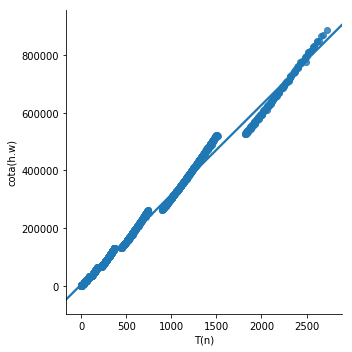

In [21]:
df["cota"] =((df["fila"]) * (df["columna"]));
# Grafico correlación.
ax1 = sns.lmplot(x='tiempo', y='cota', data=df);
plt.xlabel("T(n)");
plt.ylabel("cota(h.w)");

In [22]:
df2 = df.loc[df['columna'] <= 102]
r = np.corrcoef(df2["t"], df2["cota"])[0, 1];
print("El coeficiente de correlación de Pearson es: r="+str(r))

El coeficiente de correlación de Pearson es: r=0.9969830670899498
